In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam

import tensorflow as tf
import numpy as np

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# One-neuron model

### Inputs

* Interger between **0 to 100**
* Normalised by dividing by **100**
* Become floating numbers between **0 to 1**
* Referred to as **input1** and **input2**

### Result

* Interger between **0 to 200**
* Normalised by dividing by **200**
* Become floating numbers between **0 to 1**
* Referred to as **result**

### Formula and values

For a neuron with **two inputs**, the formula is:

$$ \begin{aligned}
y = w_1x_1 + w_2x_2 + b \qquad \text{where} & \quad x_1, x_2 \text{ are the two inputs}
\\ & \quad w_1, w_2 \text{ are the weights for the two inputs}
\\ & \quad b  \text{ is the bias}
\end{aligned}$$ 

With the data sets, $w_1$ and $w_2$ are expected to converge towards $0.5$, while $b$ is expected to converge towards $0$.

### Note

This one-neuron model was conceptualised independently, but the "acc" did not improve after many training in the initial implementation.

Looked for other examples on regression and found the "model.get_weights()" function in the link below, which allows me to verify that the weights is according to the expectation.

https://gist.github.com/macromaniac/630df68eb42d881755a3e30343252f74

In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.3.0


In [3]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

In [4]:
def get_operands_and_sums(operand):
    sums = []
    for operand1 in operand:
        for operand2 in operand:
            sums.append(operand1 + operand2)

    operands = []
    for operand1 in operand:
        for operand2 in operand:
            operands.append([operand1, operand2])

    operands = np.array(operands)
    sums = np.array(sums)
    operands = operands.astype('float32')
    sums = sums.astype('float32')
    return (operands, sums)

In [5]:
# Generate the full set of integers between 0 and 100 as operand
operand = np.arange(0, 101);
operands, sums = get_operands_and_sums(operand);

print(len(operands))
print(len(sums))
print(operands[10200])
print(sums[10200])

number_of_records = len(operands)
shuffle = np.arange(number_of_records)
np.random.shuffle(shuffle)
test_fraction = 0.8

# print(shuffle)

#making a train / test split
train_split, test_split = shuffle[:int(number_of_records*test_fraction)], shuffle[int(number_of_records*test_fraction):]
# print(train_split)
# print(test_split)
x_train , y_train = operands[train_split,:] , sums[train_split]
x_test , y_test = operands[test_split,:] , sums[test_split]

10201
10201
[ 100.  100.]
200.0


In [6]:
# Generate a subset of integers between 0 and 100 as operand

# fifties = np.empty(100)
# fifties.fill(50)
# x_train , y_train = get_operands_and_sums(fifties);

multiples_of_two = np.arange(0, 101, 2)
x_train , y_train = get_operands_and_sums(multiples_of_two);

zero_to_hundred = np.arange(0, 101);
x_test , y_test = get_operands_and_sums(zero_to_hundred);

In [7]:
x_train /= 100
x_test /= 100
y_train /= 200
y_test /= 200


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[1])
print(y_train[1])
print(x_test[1])
print(y_test[1])

(2601, 2)
(2601,)
(10201, 2)
(10201,)
[ 0.    0.02]
0.01
[ 0.    0.01]
0.005


In [8]:
# Training Parameters for basic MNIST 
learning_rate = 0.1

# Network Parameters
n_input = 2
n_output = 1

In [9]:
Inp = Input(shape=(n_input,))
output = Dense(n_output, activation='linear', name = "Outputlayer")(Inp)

In [10]:
model = Model(Inp, output)
model.summary()

model.compile(loss='mse',
              optimizer='sgd')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Outputlayer (Dense)          (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Training Parameters for basic MNIST 

# batch size of 1 give the expected weigth,
# because every training sample should give a MSE of 0,
# the batch size do not matter.
# the number of updates to the weights is more important.
training_epochs = 2
batch_size = 1

# To have the same number of updates as above
# training_epochs = len(x_train)
# batch_size = len(x_train)

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 2601 samples, validate on 10201 samples
Epoch 1/2
2601/2601 [==============================] - 5s - loss: 0.0166 - val_loss: 7.8542e-05
Epoch 2/2
2601/2601 [==============================] - 5s - loss: 1.2872e-05 - val_loss: 1.8909e-07


[array([[ 0.49885663],
       [ 0.49904233]], dtype=float32), array([ 0.00105358], dtype=float32)]


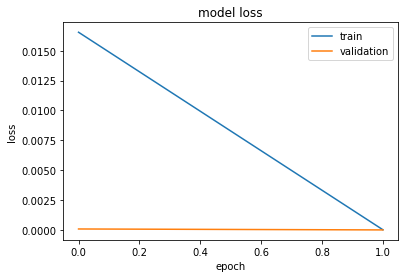

In [13]:
print(model.get_weights())
plot_train(history)

In [14]:
input1 = 33;
input2 = 45;

inputs = np.array([[input1, input2]]).astype('float32');
inputs /= 100;

preds = model.predict(inputs);

result = preds[0][0];
print(np.rint(result*200))

78.0


In [15]:
preds = model.predict(x_test[10:15])

print(x_test[10:15] * 100)
print(y_test[10:15] * 200)
print(np.rint(preds.flatten() * 200))

[[  0.  10.]
 [  0.  11.]
 [  0.  12.]
 [  0.  13.]
 [  0.  14.]]
[ 10.  11.  12.  13.  14.]
[ 10.  11.  12.  13.  14.]
